In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from AMPpred_MFA.lib.Data import load_dataset,load_fasta_from_file


mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams.update({'font.size': 12}) 
save_path_data_info = '../figures/dataset information' # Saving path
os.makedirs(save_path_data_info, exist_ok=True)

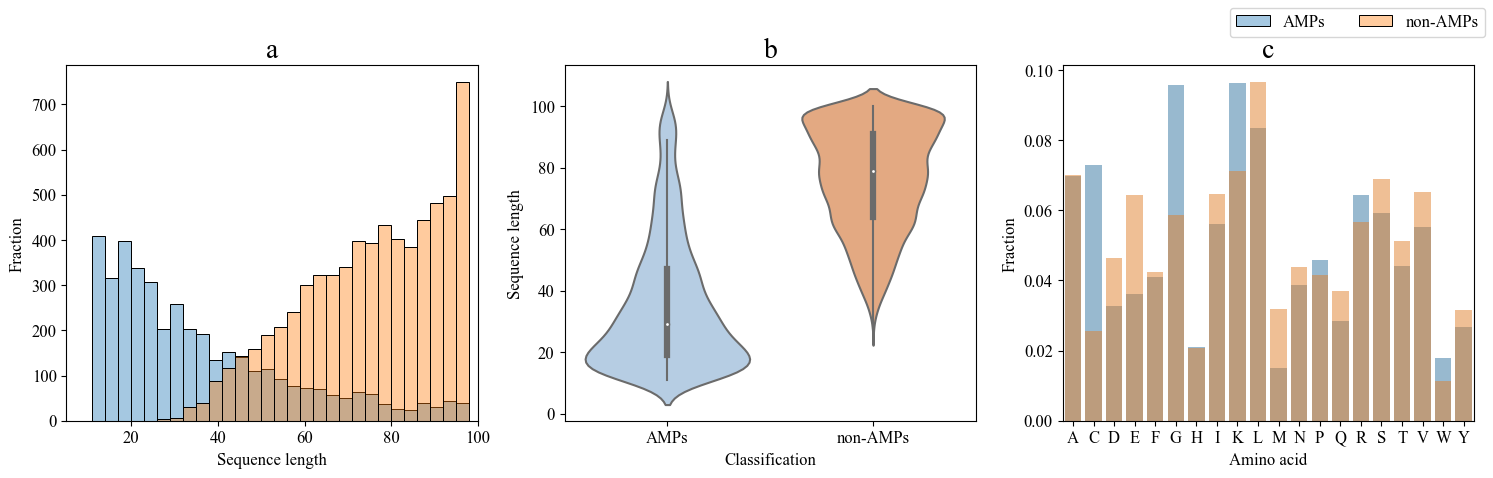

In [2]:
def plot_sequence_length_distribution(amps, non_amps):
    # Calculate sequence length and generate list of lengths
    amps_len = [len(seq) for seq in amps]
    non_amps_len = [len(seq) for seq in non_amps]
    aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K','L','M','N', 'P','Q','R', 'S', 'T', 'V', 'W', 'Y']
    amp_composition = [i for i in ''.join(amps)]
    non_amp_composition = [i for i in ''.join(non_amps)]

    color_palette = sns.color_palette([sns.color_palette('tab10')[0], sns.color_palette('tab10')[1]])
    color_palette_violin = ['#AECDEA', '#F3A672']
    alpha = 0.5

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Draw the first subplot: the histogram
    bins = range(5, 101, 3)
    
    sns.histplot(amps_len, bins=bins, kde=False, color=color_palette[0], alpha=alpha-0.1, label='AMPs', ax=axes[0])
    sns.histplot(non_amps_len, bins=bins, kde=False, color=color_palette[1], alpha=alpha-0.1, label='non-AMPs', ax=axes[0])
    axes[0].set_xlabel('Sequence length')
    axes[0].set_ylabel('Fraction')
    # axes[0].set_title('a. Histogram of sequence lengths distribution')
    axes[0].set_title('a',fontsize=20)
    # axes[0].set_title('a',x=0,y=1,fontsize=20)
    axes[0].set_xlim(5, 100)

    # Draw the second subplot: the violin plot
    sns.violinplot(data=[amps_len, non_amps_len], palette=color_palette_violin, ax=axes[1])    
    axes[1].set_xticklabels(['AMPs', 'non-AMPs'])
    axes[1].set_xlabel('Classification')
    axes[1].set_ylabel('Sequence length')
    # axes[1].set_title('b. Violinplot of sequence lengths distribution')
    axes[1].set_title('b',fontsize=20)

    # Draw the third subplot: amino acid composition histogram
    # Count amino acid occurrences
    amp_composition = pd.Categorical(amp_composition, categories=aa, ordered=True).as_ordered()
    non_amp_composition = pd.Categorical(non_amp_composition, categories=aa, ordered=True).as_ordered()
    # Calculate the probability density
    amp_density = pd.Series(amp_composition).value_counts(normalize=True, sort=False)
    non_amp_density = pd.Series(non_amp_composition).value_counts(normalize=True, sort=False)
    sns.barplot(x=aa, y=amp_density, color=color_palette[0], alpha=alpha, label='AMPs', ax=axes[2])
    sns.barplot(x=aa, y=non_amp_density,  color=color_palette[1], alpha=alpha, label='non-AMPs', ax=axes[2])
    axes[2].set_xlabel('Amino acid')
    axes[2].set_ylabel('Fraction')
    # axes[2].set_title('c. Barplot of amino acid composition')
    axes[2].set_title('c',fontsize=20)


    # Set the title and layout of the entire figure
    fig.suptitle('')
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, ncol=2)
    fig.tight_layout(rect=[0, 0.03, 1, 1])
    return fig

amps = load_fasta_from_file('./dataset/our_dataset/amps.fasta')[:,1]
non_amps = load_fasta_from_file('./dataset/our_dataset/non_amps.fasta')[:,1]
fig_our_data_info = plot_sequence_length_distribution(amps, non_amps)
fig_our_data_info.savefig(os.path.join(save_path_data_info, 'length distribution.png'),dpi=300, bbox_inches='tight')


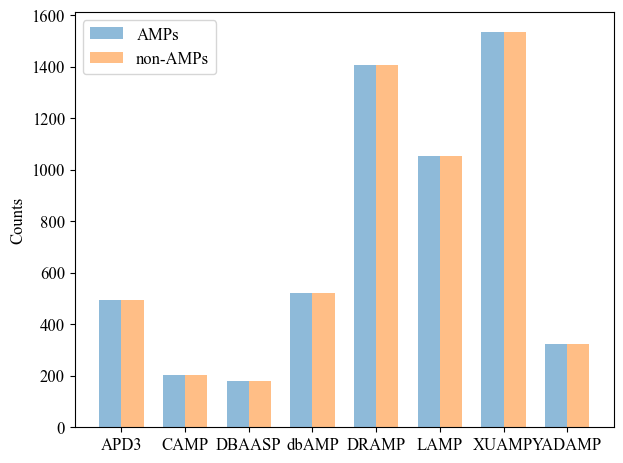

In [3]:
def dataset_info(root_dir):
    dict_info = {}
    for dir_name in os.listdir(root_dir):
        testset_path = os.path.join(root_dir, dir_name, 'test.fasta')
        dataset_label = load_dataset(testset_path)[:,2]
        dict_info[dir_name] = len(np.where(dataset_label=='1')[0]), len(np.where(dataset_label=='0')[0])
    return dict_info


def plot_bar_chart(dictionary):
    color_palette = sns.color_palette([sns.color_palette('tab10')[0], sns.color_palette('tab10')[1]])
    alpha = 0.5 
    testset_name = list(dictionary.keys())
    positive = [value[0] for value in dictionary.values()]
    negative = [value[1] for value in dictionary.values()]
    x = np.arange(len(testset_name))
    width = 0.35
    fig, ax = plt.subplots()
    ax.bar(x - width/2, positive, width, label='AMPs', alpha=alpha, color=color_palette[0])
    ax.bar(x + width/2, negative, width, label='non-AMPs', alpha=alpha, color=color_palette[1])
    ax.set_ylabel('Counts')
    # ax.set_xlabel('Independent test datasets')
    ax.set_xticks(x)
    ax.set_xticklabels(testset_name)
    ax.legend()
    fig.tight_layout()
    return fig


other_testset_info = dataset_info('./dataset/test/other_testset/')
fig_other_testset_info = plot_bar_chart(other_testset_info)    
fig_other_testset_info.savefig(os.path.join(save_path_data_info, '8 other independent test datasets.png'), dpi=300, bbox_inches='tight')

                                                                                                  id
APD3  CAMP  DBAASP dbAMP DRAMP LAMP  XUAMP YADAMP                                                   
True  False False  False False False False False   DGVKLCDVPSGTWSGHCGSSSKCSQQCKDREHFAYGGACHYQFPSV...
                   True  False False False False                  VFIDILDKVENAIHNAAQVGIGFAKPFEKLINPK
                               True  False False   AACARFIDDFCDTLTPNIYRPRDNGQRCYAVNGHRCDFTVFNTNNG...
                   False True  False False True                           KSSAYSLQMGATAIKQVKKLFKKWGW
                         False False False False               GILDTLKQFAKGVGKDLVKGAAQGVLSTVSCKLAKTC
...                                                                                              ...
False False False  False False False False True                    ADRGWIKTLTKDCPNVISSICAGTIITACKNCA
                                           True                        TPACAIGVVGITVAVTGIST

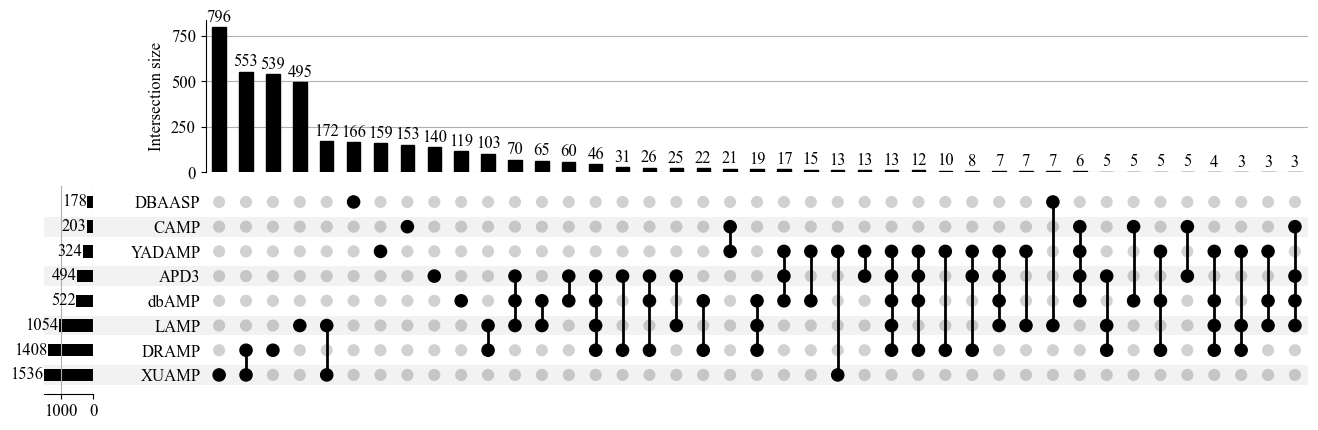

In [4]:
def dataset_seq_info_(root_dir):
    dict_info = {}
    for dir_name in os.listdir(root_dir):
        testset_path = os.path.join(root_dir, dir_name, 'test.fasta')
        dataset = load_dataset(testset_path)
        dict_info[dir_name] = dataset[np.where(dataset[:,2]=='1')[0]][:,1]
    return dict_info


def plot_intersection(dictionary):
    from upsetplot import from_contents, UpSet
    fig = plt.figure()
    upset_data = from_contents(dictionary)
    print(upset_data)
    upset = UpSet(upset_data,sort_by='cardinality',show_counts=True,min_subset_size=3,element_size=25)
    upset.plot(fig)
    # fig.set_figheight(5)
    # fig.set_figwidth(14)
    return fig


other_testset_info = dataset_seq_info_('./dataset/test/other_testset/')
fig_other_testset_info = plot_intersection(other_testset_info)    
fig_other_testset_info.savefig(os.path.join(save_path_data_info, 'The number of overlapping samples among the 8 independent testsets.png'), dpi=300, bbox_inches='tight')